Cross-Validation Scores for k=5: [1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
Mean Accuracy for k=5: 0.9666666666666668
Optimal k value: 13


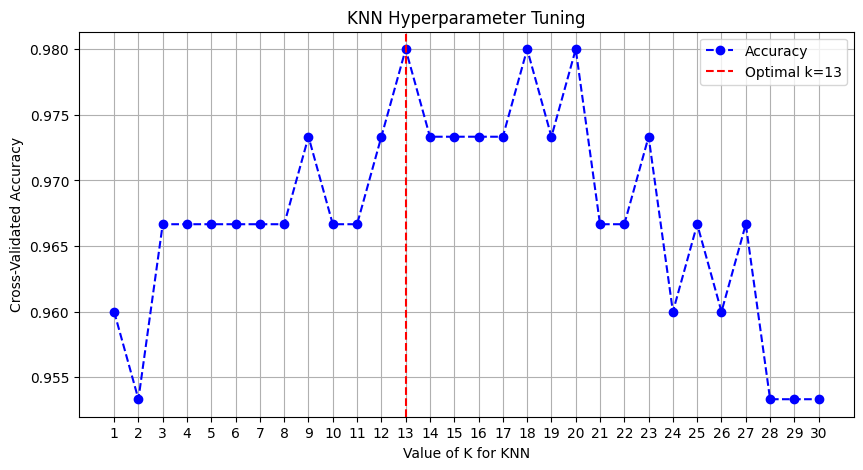

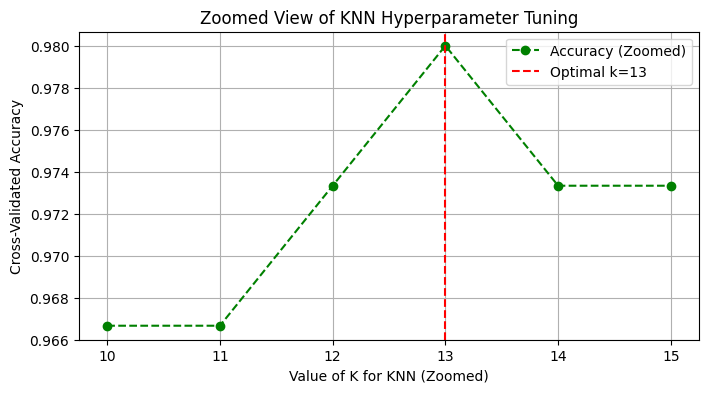

Optimal k using GridSearchCV: 13
Best cross-validated accuracy: 0.9800000000000001


In [4]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Step 2: Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target  # Features and target

# Step 3: Perform 10-Fold Cross-Validation for Initial Model (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn, X, y, cv=10)

# Display cross-validation results for k=5
print("Cross-Validation Scores for k=5:", cv_scores)
print("Mean Accuracy for k=5:", cv_scores.mean())

# Step 4: Find the Optimal k using Cross-Validation
k_range = range(1, 31)  # Testing k values from 1 to 31
cv_scores_all = []  # Store accuracy for each k

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)  # 10-fold cross-validation
    cv_scores_all.append(scores.mean())  # Store the mean accuracy

# Find the optimal k (highest accuracy)
optimal_k = k_range[np.argmax(cv_scores_all)]
print(f"Optimal k value: {optimal_k}")

# Step 5: Plot "Value of K for KNN" vs. "Cross-Validated Accuracy" (Full Range)
plt.figure(figsize=(10, 5))
plt.plot(k_range, cv_scores_all, marker='o', linestyle='dashed', color='b', label="Accuracy")
plt.axvline(optimal_k, color='r', linestyle='dashed', label=f'Optimal k={optimal_k}')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.legend()
plt.xticks(k_range)
plt.grid()
plt.show()

# Step 6: Zoomed-in Plot for k values around the optimal k (10-15)
plt.figure(figsize=(8, 4))
plt.plot(k_range[9:15], cv_scores_all[9:15], marker='o', linestyle='dashed', color='g', label="Accuracy (Zoomed)")
plt.axvline(optimal_k, color='r', linestyle='dashed', label=f'Optimal k={optimal_k}')
plt.xlabel('Value of K for KNN (Zoomed)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Zoomed View of KNN Hyperparameter Tuning')
plt.legend()
plt.grid()
plt.show()

# Step 7: Confirm Optimal k Using GridSearchCV
param_grid = {'n_neighbors': range(1, 31)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
grid_search.fit(X, y)

# Print the best parameter (optimal k)
print("Optimal k using GridSearchCV:", grid_search.best_params_['n_neighbors'])
print("Best cross-validated accuracy:", grid_search.best_score_)
